<a href="https://colab.research.google.com/github/niplessa/Thesis_Data-mining-study-on-medical-and-sociological-Data-regarding-Covid19/blob/code/NLP_2_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eda & Clustering & Sentiment analysis on Covid-19 related tweets

Dataset accessed from: https://www.kaggle.com/gpreda/covid19-tweets

In [ ]:
#import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 3000)
#pd.set_option('display.max_colwidth', 50)

import  matplotlib.pyplot as plt
import  seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import regexp_tokenize 
from string import punctuation
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import re

import string
from string import punctuation

stopwords_eng = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Import Tweets

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for kaggle tweets
path = '/content/drive/My Drive/datasets/covid19_tweets.csv'
tweets = pd.read_csv(path)

In [ ]:
tweets = tweets.drop_duplicates(subset="text", keep = "first")   #drop duplicate tweets
tweets.text = tweets.text.astype('str')

In [ ]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
tweets.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [ ]:
tweets.shape

(178683, 13)

## NLP text preprocess

In [ ]:
#lematization function
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized = []
    for word in text:
        lemmatized.append(lemmatizer.lemmatize(word))
    return lemmatized

#remove stopwords function
stops =  list(stopwords_eng)
def remove_stops(text):
    text_no_stops = []
    for i in text:
        if i not in stops:
            if len(i) == 1:
                pass
            else:
                text_no_stops.append(i)
        else:
            pass
    return text_no_stops

In [ ]:
tweets['clean_text'] = tweets['text'].astype(str)


tweets['clean_text'] = tweets['text'].str.replace("\n", " ") #replace newline char with space

# make all text lowercase
tweets['clean_text'] = tweets['text'].apply(lambda x: x.lower())

# removing everything except alphabets
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z]", " ")

# removing short words <3 letters length
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
#remove links with regex
p=re.compile('(www|http)\S+')
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub(p,' ',x))

#remove @
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub('@','',x))

#remove #
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: re.sub('#','',x))

In [ ]:
# tokenization
tweets['text_tokenized'] = tweets['clean_text'].apply(lambda x: regexp_tokenize(x,"[\w']+"))

#actually remove stopwords
tweets['text_tokenized'] = tweets['text_tokenized'].apply(lambda x: remove_stops(x))

In [ ]:
#lemmatization
tweets['text_lemmatized'] = tweets['text_tokenized'].apply(lemmatize_text)

In [ ]:
#stemming
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
tweets['text_stemmed'] = tweets['text_tokenized'].apply(lambda x: [ps.stem(y) for y in x])

In [ ]:
#de - tokenization
tweets['stemmed_string'] = tweets['text_stemmed'].apply(lambda x: ' '.join(x))
tweets['lemmatized_string'] = tweets['text_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,text_tokenized,text_lemmatized,text_stemmed,stemmed_string,lemmatized_string
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,smelled scent hand sanitizers today someone pa...,"[smelled, scent, hand, sanitizers, today, some...","[smelled, scent, hand, sanitizers, today, some...","[smell, scent, hand, sanit, today, someon, pas...",smell scent hand sanit today someon past would...,smelled scent hand sanitizers today someone pa...
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,yankees yankeespr wouldn have made more sense ...,"[yankees, yankeespr, made, sense, players, res...","[yankee, yankeespr, made, sense, player, respe...","[yanke, yankeespr, made, sens, player, respect...",yanke yankeespr made sens player respect zgypu,yankee yankeespr made sense player respect zgypu
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,diane wdunlap realdonaldtrump trump never once...,"[diane, wdunlap, realdonaldtrump, trump, never...","[diane, wdunlap, realdonaldtrump, trump, never...","[dian, wdunlap, realdonaldtrump, trump, never,...",dian wdunlap realdonaldtrump trump never claim...,diane wdunlap realdonaldtrump trump never clai...
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,brookbanktv gift covid give appreciation simpl...,"[brookbanktv, gift, covid, give, appreciation,...","[brookbanktv, gift, covid, give, appreciation,...","[brookbanktv, gift, covid, give, appreci, simp...",brookbanktv gift covid give appreci simpl thin...,brookbanktv gift covid give appreciation simpl...
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,july media bulletin novel coronavirusupdates c...,"[july, media, bulletin, novel, coronavirusupda...","[july, medium, bulletin, novel, coronavirusupd...","[juli, media, bulletin, novel, coronavirusupd,...",juli media bulletin novel coronavirusupd covid...,july medium bulletin novel coronavirusupdates ...


## Create separate dataframe for mask related tweets

In [ ]:
keywords = ["mask","facemask","masks","mask","facecover","face","Mask","Masks","masque"]

In [ ]:
tweet_masks = pd.DataFrame()

for k in keywords :
    tmp = tweets[tweets['clean_text'].str.lower().str.contains(k)]
    tweet_masks = tweet_masks.append(tmp)
    
    
    
tweet_masks.sort_values("date", inplace = True,ascending = False)   #sort by date
tweet_masks.drop_duplicates(subset="clean_text", keep = "first", inplace = True)        #drop duplicate tweets
                      
tweet_masks = tweet_masks.reset_index(drop=True) #reset index
print("Mask related tweets: ",tweet_masks.shape[0])

Mask related tweets:  10034


In [ ]:
tweet_masks.clean_text.head(20)

0     anti mask protest paris this weekend drew peop...
1     california hell allowing leftists tell wear ma...
2     stay safe while about this weekend remember ke...
3     wearing face covering helps stop spread covid ...
4     stay safe while about this weekend remember ke...
5     stay safe while about this weekend remember ke...
6     stay safe while about this weekend remember ke...
7     covid must wear face covering range additional...
8     suewilson bremaininspain metrouk nice graphic ...
9     this bitch wear mask cannot course meant femal...
10    homemade facecover facemask should used everyd...
11    keep calm mask share your mask with others cov...
12    these biden supporters that trump haters will ...
13    find about latest rules wearing face covering ...
14    takeresponsibility stay safe healthy wear face...
15    whatever country live either live visit wales ...
16    whatever country live either live visit wales ...
17    maintain physical distancing wear mask avo

# EDA on covid tweets df

## Split date and time

In [ ]:
tweets['date'] = pd.to_datetime(tweets['date']) 
tweets = tweets.sort_values(['date'])
tweets['day'] = tweets['date'].astype(str).str.split(' ', expand=True)[0]
tweets['day'] = pd.to_datetime(tweets['day'])
#tweets = tweets.reset_index()
tweets.head()
tweets.reset_index(inplace = True)

## Plot hashtags frequency

In [ ]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets['hashtag'] = tweets['hashtags'].apply(lambda row : split_hashtags(row))
tweets = tweets.explode('hashtag')
tweets['hashtag'] = tweets['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
tweets = tweets[tweets['hashtag']!='nan']


In [ ]:
hashtags = tweets.groupby(['day', 'hashtag'])['user_name'].count().reset_index()
hashtags.columns = ['day', 'hashtag', 'count']

In [ ]:
def plot_hashtags_by_day(data, hashtag):
    data = data[data['hashtag']==hashtag]
    fig = px.line(
        data, 
        x='day', 
        y='count', 
        #orientation='v', 
        title='Dynamic of hashtag "' + hashtag + '"' , 
        width=800
    )
    fig.show()


In [ ]:
plot_hashtags_by_day(hashtags, 'covid19')

In [ ]:
plot_hashtags_by_day(hashtags, 'coronavirus')

In [ ]:
plot_hashtags_by_day(hashtags, 'trump')

Most frequent users/accounts in the dataframe

In [ ]:
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:10])
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Covid-19'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



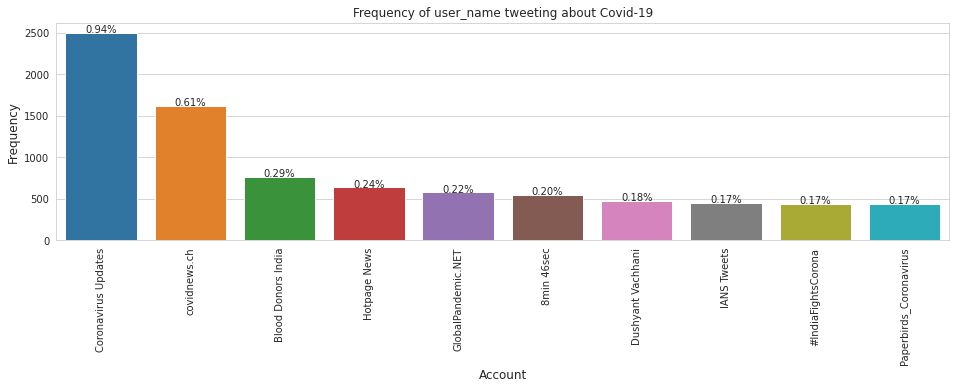

In [ ]:
plot_frequency_charts(tweets, 'user_name', 'Account')

Plot frequencies for locations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



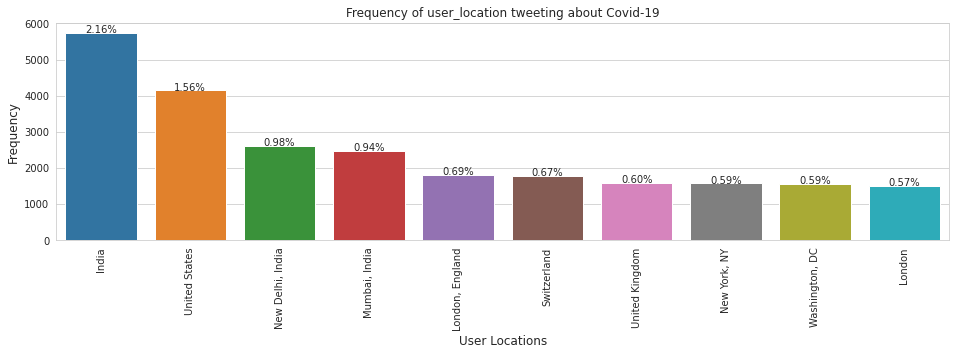

In [ ]:
plot_frequency_charts(tweets, 'user_location', 'User Locations')

Plot frequencies for #hashtags

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



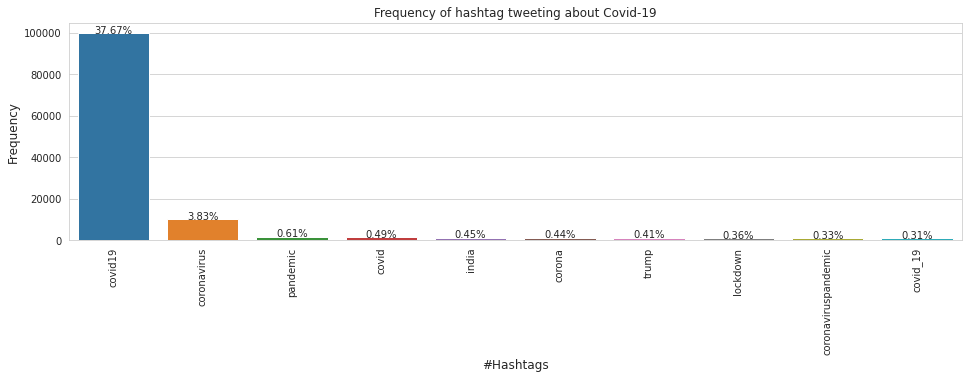

In [ ]:
plot_frequency_charts(tweets, 'hashtag', '#Hashtags')


## Wordcloud

In [ ]:
tweets.shape

(265138, 22)

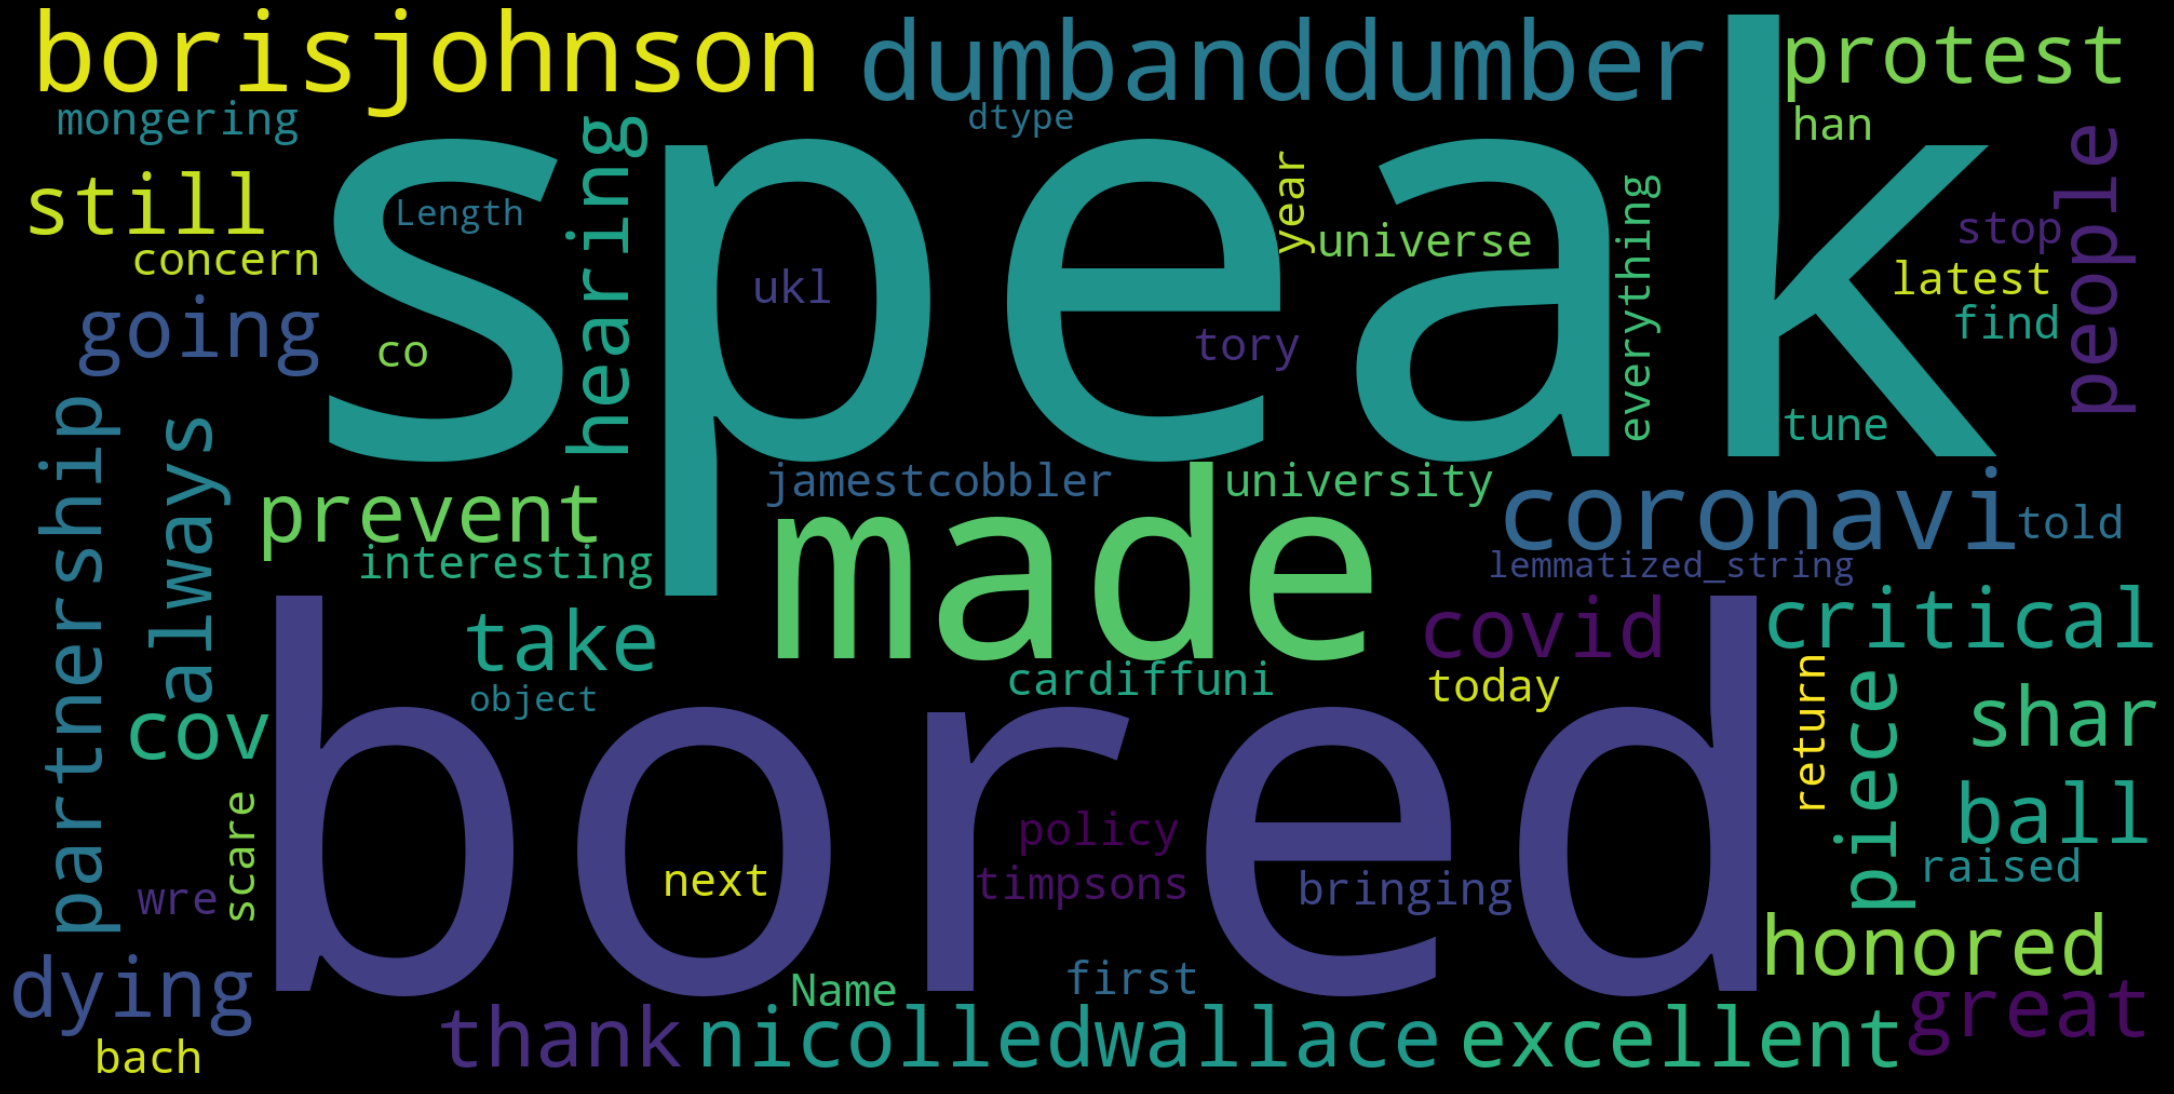

In [ ]:
text = tweets.lemmatized_string
wordcloud = WordCloud(
    max_words = 100, 
    width = 2000,
    height = 1000,
    background_color = 'black',
    ).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

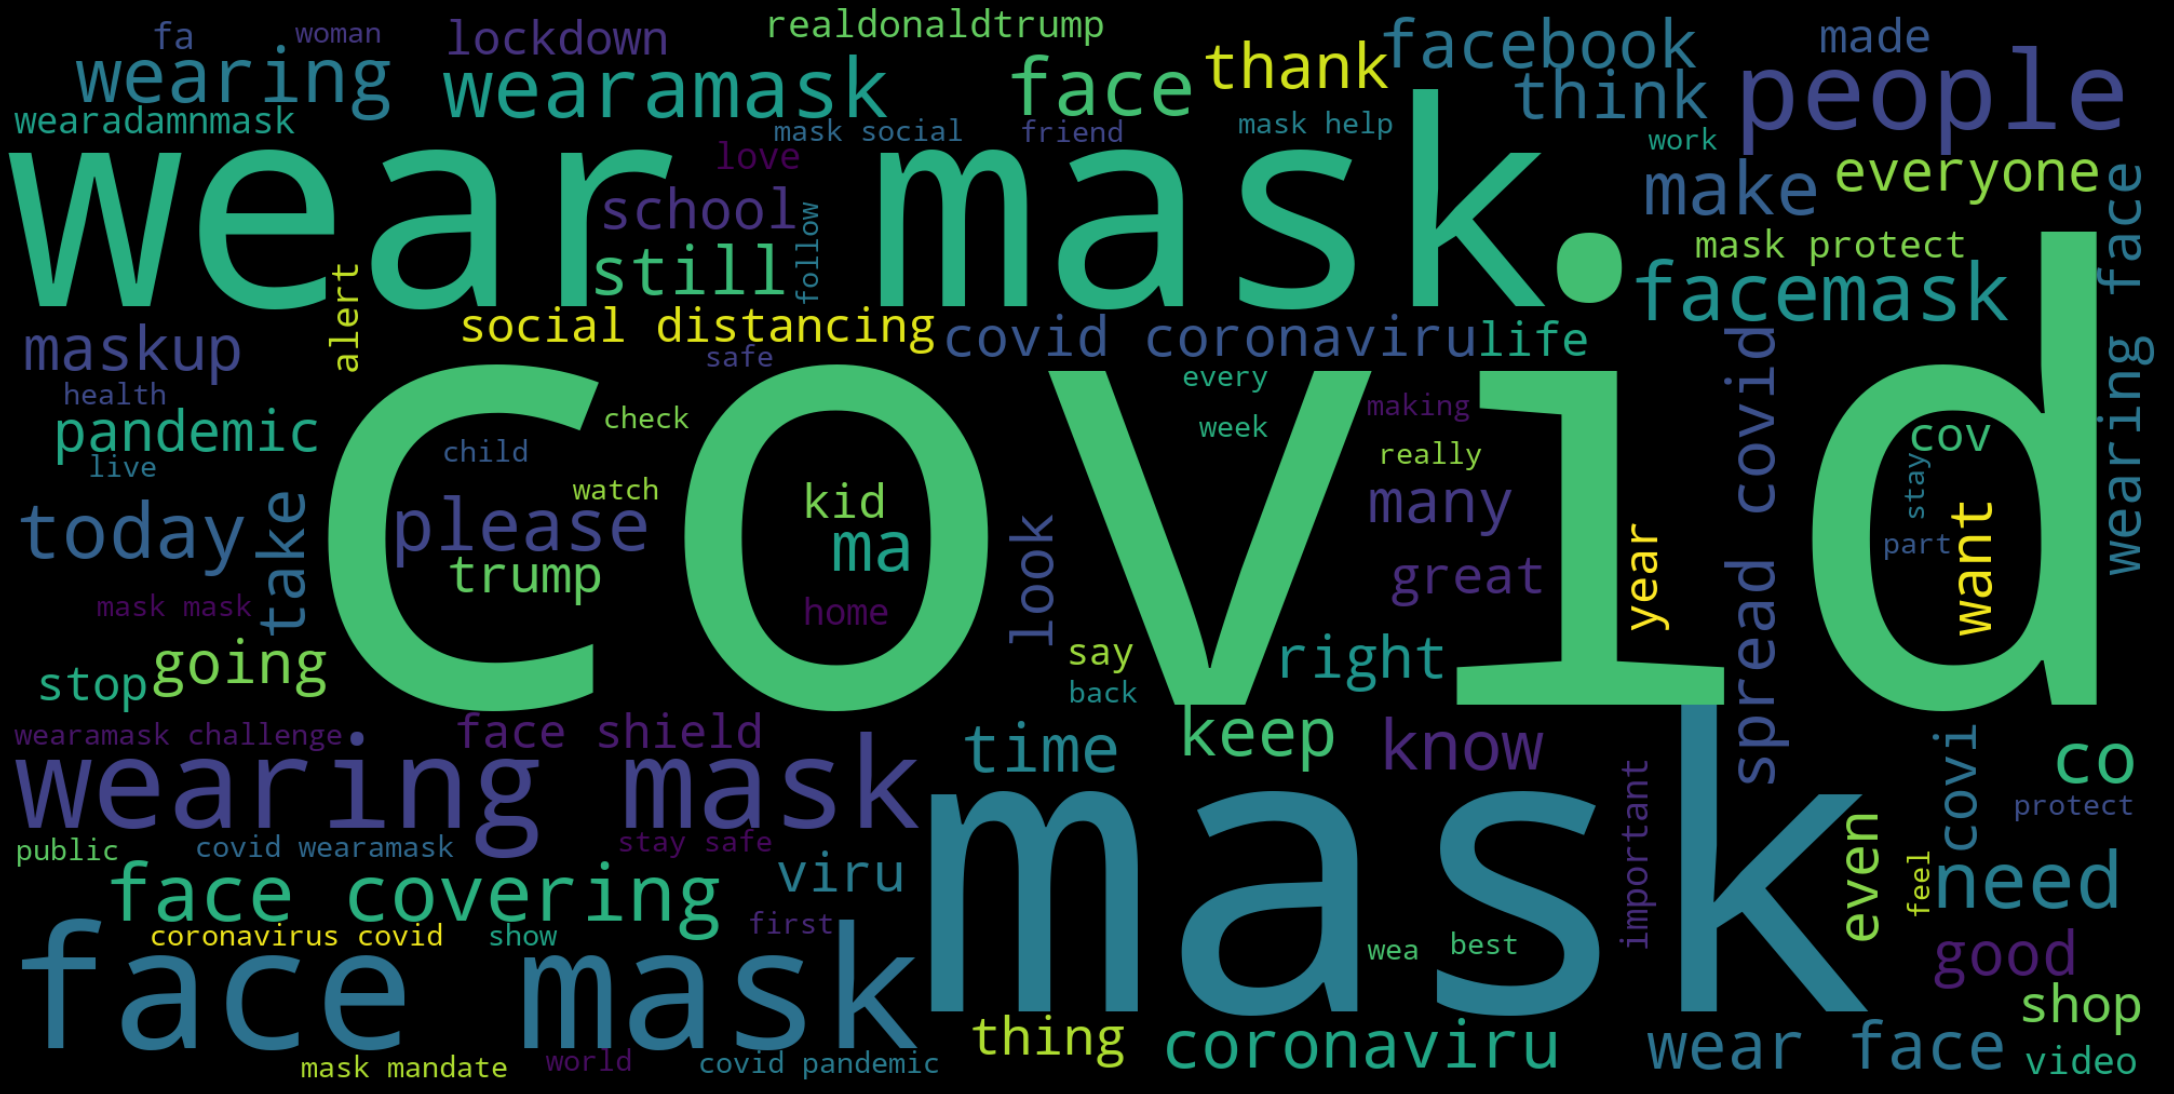

In [ ]:
text = tweet_masks.lemmatized_string
wordcloud = WordCloud(
    max_words = 100, 
    width = 2000,
    height = 1000,
    background_color = 'black',
    ).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#TFIDF Vectorizer & Clustering

In [ ]:
tweets.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,text_tokenized,text_lemmatized,text_stemmed,stemmed_string,lemmatized_string,day,hashtag
1,17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,always honored speak nicolledwallace about cri...,"[always, honored, speak, nicolledwallace, crit...","[always, honored, speak, nicolledwallace, crit...","[alway, honor, speak, nicolledwallac, critic, ...",alway honor speak nicolledwallac critic covid ...,always honored speak nicolledwallace critical ...,2020-07-24,covid19
2,17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,excellent partnership prevent covid thank shar...,"[excellent, partnership, prevent, covid, thank...","[excellent, partnership, prevent, covid, thank...","[excel, partnership, prevent, covid, thank, sh...",excel partnership prevent covid thank sharp ro...,excellent partnership prevent covid thank shar...,2020-07-24,covid19
3,17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,take your ball there still protests going more...,"[take, ball, still, protests, going, people, d...","[take, ball, still, protest, going, people, dy...","[take, ball, still, protest, go, peopl, die, c...",take ball still protest go peopl die covid iln...,take ball still protest going people dying cov...,2020-07-24,covid19
5,17170,Ben Garnham Pennywise,"Wales, United Kingdom","DJ, Radio Host, Pennywise, Terminator, Lost Bo...",2010-11-28 22:00:30,613,1996,535,False,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,"['borisjohnson', 'dumbanddumber', 'coronavirus...",Twitter for Android,False,bored made this borisjohnson dumbanddumber cor...,"[bored, made, borisjohnson, dumbanddumber, cor...","[bored, made, borisjohnson, dumbanddumber, cor...","[bore, made, borisjohnson, dumbanddumb, corona...",bore made borisjohnson dumbanddumb coronaviru ...,bored made borisjohnson dumbanddumber coronavi...,2020-07-24,borisjohnson
5,17170,Ben Garnham Pennywise,"Wales, United Kingdom","DJ, Radio Host, Pennywise, Terminator, Lost Bo...",2010-11-28 22:00:30,613,1996,535,False,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,"['borisjohnson', 'dumbanddumber', 'coronavirus...",Twitter for Android,False,bored made this borisjohnson dumbanddumber cor...,"[bored, made, borisjohnson, dumbanddumber, cor...","[bored, made, borisjohnson, dumbanddumber, cor...","[bore, made, borisjohnson, dumbanddumb, corona...",bore made borisjohnson dumbanddumb coronaviru ...,bored made borisjohnson dumbanddumber coronavi...,2020-07-24,dumbanddumber


K-means text clustering: 
https://medium.com/@lucasdesa/text-clustering-with-k-means-a039d84a941b

## K-Means

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords_eng, 
#max_features= 1000, # keep top 1000 terms
#max_df=0.3, 
#min_df = 50, 
smooth_idf=True,
use_idf = True,
ngram_range=(1,3))

#vectorizer = TfidfVectorizer(use_idf = True, ngram_range=(1,2))

 
X = vectorizer.fit_transform(tweets['lemmatized_string'])
terms = vectorizer.get_feature_names()

In [ ]:
num_clusters = 10

km = KMeans(n_clusters=num_clusters,init='k-means++', max_iter=100, n_init=10, random_state=1)

labels = km.fit_predict(X)

In [ ]:
tweets['cluster'] = labels

In [ ]:
#most important n-gramms (words) in each cluster

print("K-means clustering: \n")
asc_order_centroids = km.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print('\n')


K-means clustering: 

Cluster 0:
 coronavirus
 covid
 coronavirus covid
 covid coronavirus
 covid covid
 case
 update
 covid covid covid
 india
 death


Cluster 1:
 case sooner
 risk case sooner
 risk case
 identify risk case
 covid identify risk
 identify risk
 spread covid identify
 covid identify
 case sooner self
 sooner self


Cluster 2:
 pandemic
 covid pandemic
 covid
 coronavirus
 pandemic covid
 coronavirus pandemic
 global pandemic
 global
 covid coronavirus pandemic
 artist


Cluster 3:
 life
 read
 covid
 life covid
 save
 save life
 coronavirus
 lost
 latest
 today


Cluster 4:
 bsnl
 even terrible situation
 situation covid bsnl
 covid bsnl
 covid bsnl staff
 terrible situation covid
 terrible situation
 even terrible
 bsnl staff
 pride india even


Cluster 5:
 blood
 need
 blood component
 need blood type
 blood type
 component need
 blood component need
 component
 need blood
 component need plasma


Cluster 6:
 american
 watch american died
 realdonaldtrump watch ameri

### Visualize Cluster Size

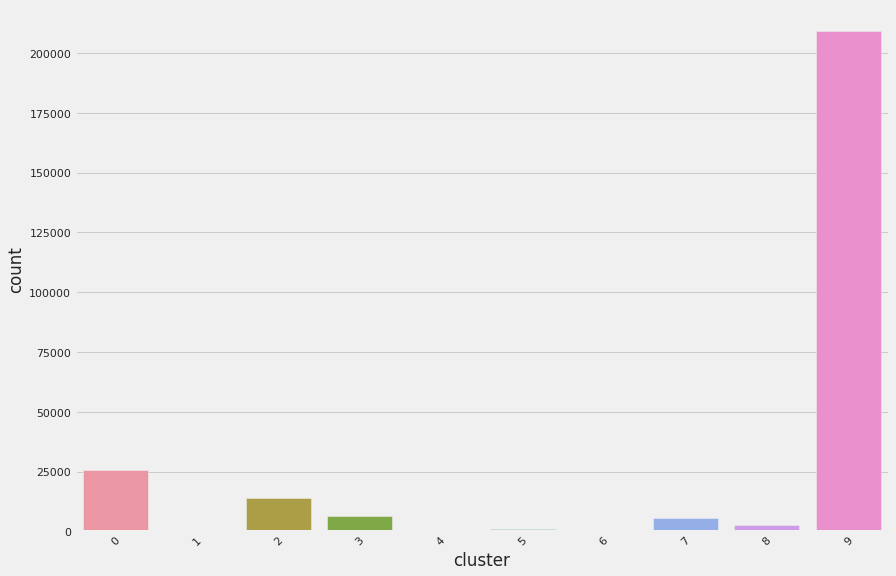

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,9)})
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='cluster', data=tweets)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

### Most Common N-grams in each cluster

In [ ]:
from nltk import trigrams
from nltk import bigrams
from collections import Counter

print('Top Bigrams')
for i in range(num_clusters):
  L = [x for x in tweets[tweets['cluster']==i].lemmatized_string for x in bigrams(x.split())]
  c = Counter(L)
  top = c.most_common(10)
  print("\n Cluster: ",i)
  print (top)
  print('\n')

print('Top Trigrams')
for i in range(num_clusters):
  L = [x for x in tweets[tweets['cluster']==i].lemmatized_string for x in trigrams(x.split())]
  c = Counter(L)
  top = c.most_common(10)
  print("\n Cluster: ",i)
  print (top)
  print('\n')


Top Bigrams

 Cluster:  0
[(('coronavirus', 'covid'), 9456), (('covid', 'coronavirus'), 8580), (('covid', 'covid'), 6683), (('covid', 'case'), 1425), (('coronavirus', 'case'), 1387), (('case', 'death'), 739), (('covid', 'india'), 702), (('case', 'coronavirus'), 645), (('india', 'covid'), 538), (('coronavirus', 'trump'), 469)]



 Cluster:  1
[(('help', 'slow'), 527), (('slow', 'spread'), 527), (('spread', 'covid'), 527), (('covid', 'identify'), 527), (('identify', 'risk'), 527), (('risk', 'case'), 527), (('case', 'sooner'), 527), (('sooner', 'self'), 523), (('self', 'reporting'), 522), (('reporting', 'symptom'), 518)]



 Cluster:  2
[(('covid', 'pandemic'), 6852), (('pandemic', 'covid'), 1256), (('coronavirus', 'pandemic'), 1128), (('coronavirus', 'covid'), 1041), (('covid', 'coronavirus'), 951), (('global', 'pandemic'), 754), (('news', 'coronavirus'), 595), (('pandemic', 'news'), 584), (('covid', 'covid'), 558), (('pandemic', 'archive'), 355)]



 Cluster:  3
[(('life', 'covid'), 419

### Random Tweets for each cluster


In [ ]:
for i in range(0,10):
  print("\ncluster =",i)
  print('\n')
  print(tweets[tweets['cluster']==i].clean_text.sample(10))


cluster = 0


159701            covid data coronavirus covid   ctdh njgbo
149365    turns native americans still catching coronavi...
94465     healthcare health wellness coronavirus covid s...
55265     morocco coronavirus update august coronavirus ...
73387     your damn mask come getchoo covid coronavirus ...
17946     update cases coronavirus covid covid colombia ...
172529    host private video meetings azure with jitsi c...
19141     bigbreaking north korea reported first suspect...
104142    total coronavirus death toll bahrain risen con...
5669      texas hospital overwhelmed coronavirus send so...
Name: clean_text, dtype: object

cluster = 1


165887    help slow spread covid identify risk cases soo...
135712    help slow spread covid identify risk cases soo...
8826      help slow spread covid identify risk cases soo...
162124    help slow spread covid identify risk cases soo...
64571     help slow spread covid identify risk cases soo...
137903    help slow spread covid ident

#Sentiment Analysis

In [ ]:
!pip install NRCLex
!python -m textblob.download_corpora

     |████████████████████████████████| 399kB 8.2MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-cp36-none-any.whl size=43311 sha256=87f7aac3563b655b8284305662a960bd463ea1ab140d732e3504a189d98f0a8d
  Stored in directory: /root/.cache/pip/wheels/17/31/64/035a8d245b4c217aeb8e8a2702d05dc91544b9c2334db72414
Successfully built NRCLex
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_

In [ ]:
from nrclex import NRCLex 


In [ ]:
tweets['emotion'] = ''


In [ ]:
tweets.reset_index(inplace=True,drop=True)
tweets.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,text_tokenized,text_lemmatized,text_stemmed,stemmed_string,lemmatized_string,day,hashtag,cluster,emotion
0,17174,Dr. Lipi #TrustDrFauci Roy,"New York, USA",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120,True,2020-07-24 23:47:12,Always honored to speak w @NicolleDWallace abo...,['covid19'],Twitter Web App,False,always honored speak nicolledwallace about cri...,"[always, honored, speak, nicolledwallace, crit...","[always, honored, speak, nicolledwallace, crit...","[alway, honor, speak, nicolledwallac, critic, ...",alway honor speak nicolledwallac critic covid ...,always honored speak nicolledwallace critical ...,2020-07-24,covid19,9,
1,17173,Patty Hayes,"Seattle, WA",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276,False,2020-07-24 23:47:12,"Excellent partnership to prevent #COVID19, tha...",['COVID19'],Twitter for Android,False,excellent partnership prevent covid thank shar...,"[excellent, partnership, prevent, covid, thank...","[excellent, partnership, prevent, covid, thank...","[excel, partnership, prevent, covid, thank, sh...",excel partnership prevent covid thank sharp ro...,excellent partnership prevent covid thank shar...,2020-07-24,covid19,9,
2,17172,Clive Gorman,"Victoria, British Columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824,False,2020-07-24 23:47:12,Don't take your eye off the ball. There are st...,['COVID19'],Twitter for Android,False,take your ball there still protests going more...,"[take, ball, still, protests, going, people, d...","[take, ball, still, protest, going, people, dy...","[take, ball, still, protest, go, peopl, die, c...",take ball still protest go peopl die covid iln...,take ball still protest going people dying cov...,2020-07-24,covid19,9,
3,17170,Ben Garnham Pennywise,"Wales, United Kingdom","DJ, Radio Host, Pennywise, Terminator, Lost Bo...",2010-11-28 22:00:30,613,1996,535,False,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,"['borisjohnson', 'dumbanddumber', 'coronavirus...",Twitter for Android,False,bored made this borisjohnson dumbanddumber cor...,"[bored, made, borisjohnson, dumbanddumber, cor...","[bored, made, borisjohnson, dumbanddumber, cor...","[bore, made, borisjohnson, dumbanddumb, corona...",bore made borisjohnson dumbanddumb coronaviru ...,bored made borisjohnson dumbanddumber coronavi...,2020-07-24,borisjohnson,0,
4,17170,Ben Garnham Pennywise,"Wales, United Kingdom","DJ, Radio Host, Pennywise, Terminator, Lost Bo...",2010-11-28 22:00:30,613,1996,535,False,2020-07-24 23:47:20,I was bored so I made this 😂🤣😂\n\n#borisjohnso...,"['borisjohnson', 'dumbanddumber', 'coronavirus...",Twitter for Android,False,bored made this borisjohnson dumbanddumber cor...,"[bored, made, borisjohnson, dumbanddumber, cor...","[bored, made, borisjohnson, dumbanddumber, cor...","[bore, made, borisjohnson, dumbanddumb, corona...",bore made borisjohnson dumbanddumb coronaviru ...,bored made borisjohnson dumbanddumber coronavi...,2020-07-24,dumbanddumber,0,


In [ ]:
for i in range(0,tweets.shape[0]):
  text = tweets['lemmatized_string'][i]
  text_object = NRCLex(text)
  tweets['emotion'][i] = text_object.top_emotions[0][0]
  #tweets['emotion_score'][i] = text_object.top_emotions[0][1]
  #print("\n")
  #print(text_object.words)
  #print(text_object.top_emotions)
  #print(i)
  #print("\n")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Plot Emotion for all tweets

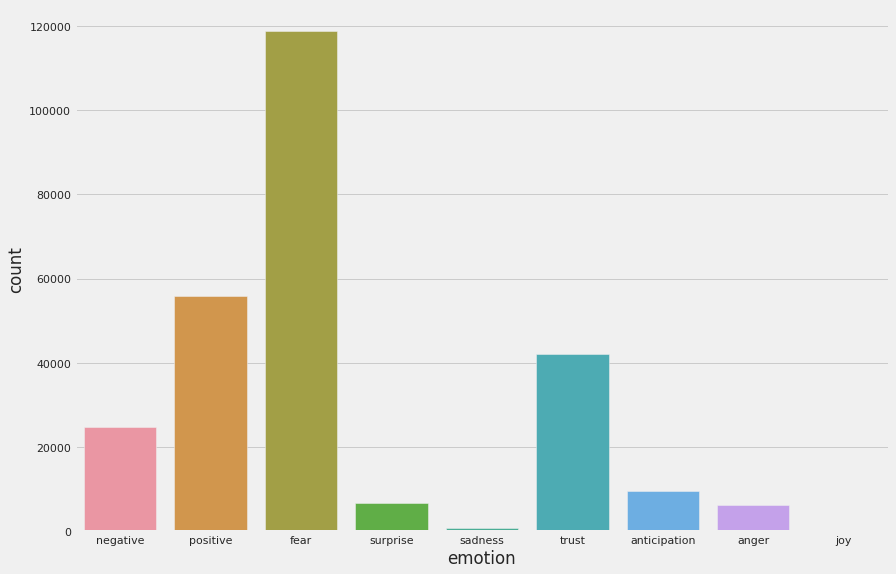

In [ ]:
ax = sns.countplot(x= 'emotion', data=tweets, order=['negative', 'positive', 'fear', 'surprise', 'sadness','trust','anticipation','anger', 'joy'])
plt.show()

## Plot emotions for each cluster


Cluster:  0




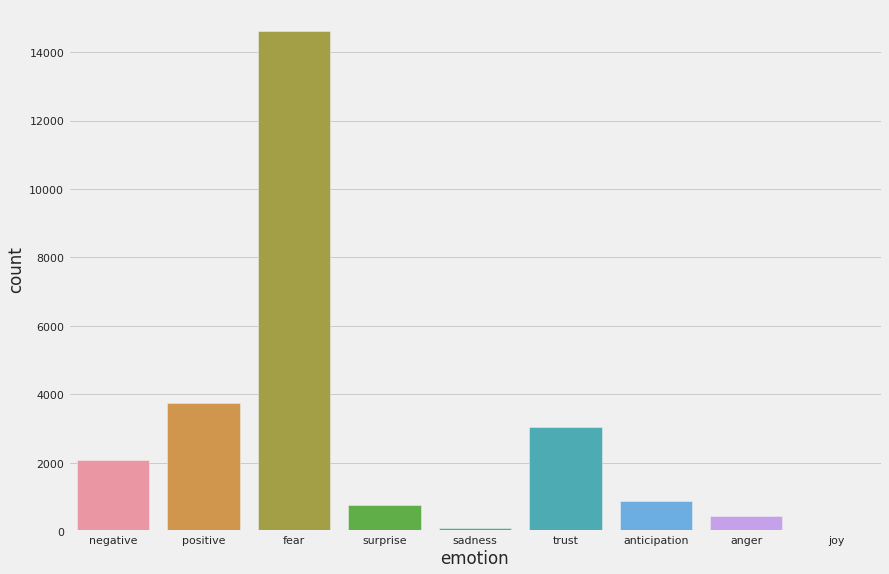


Cluster:  1




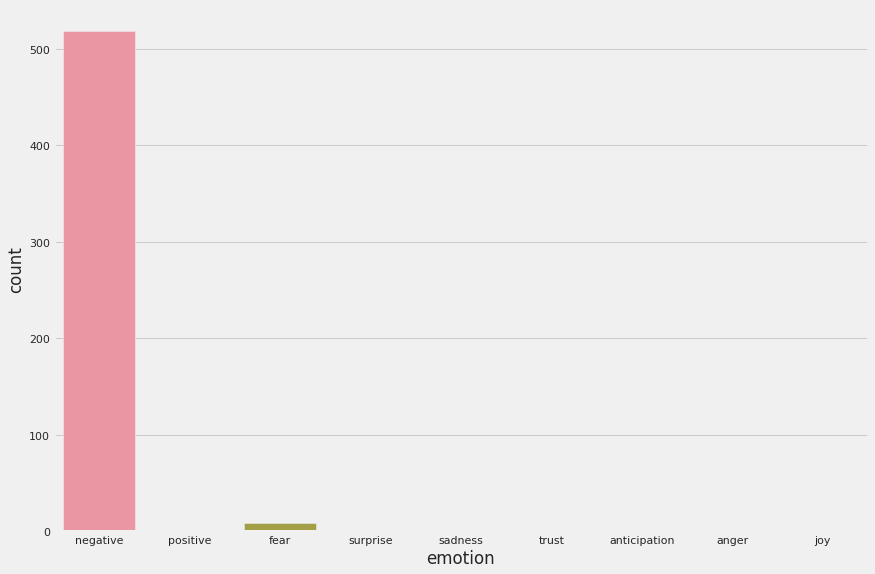


Cluster:  2




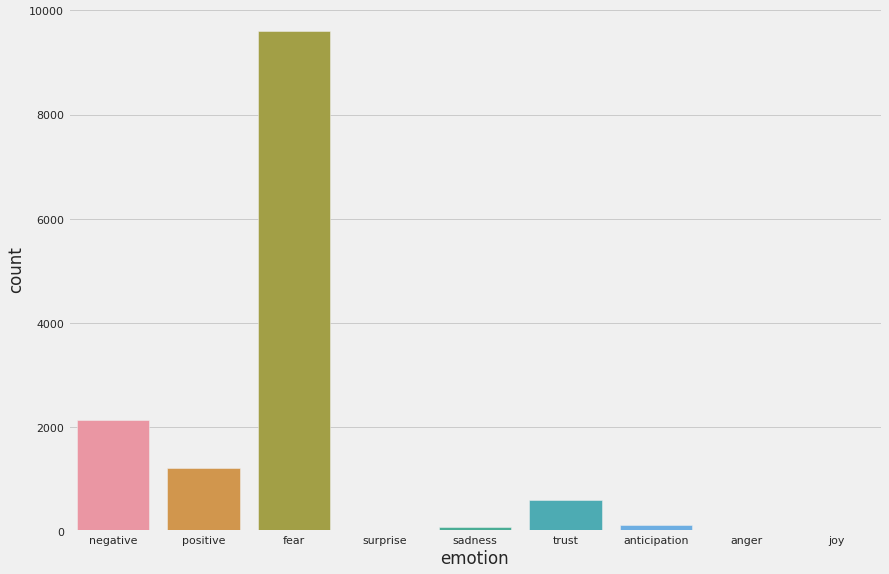


Cluster:  3




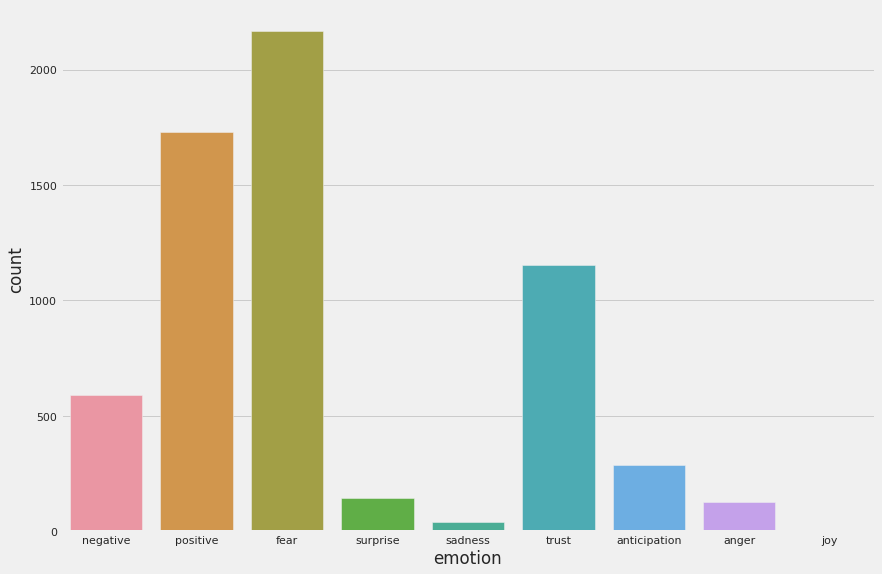


Cluster:  4




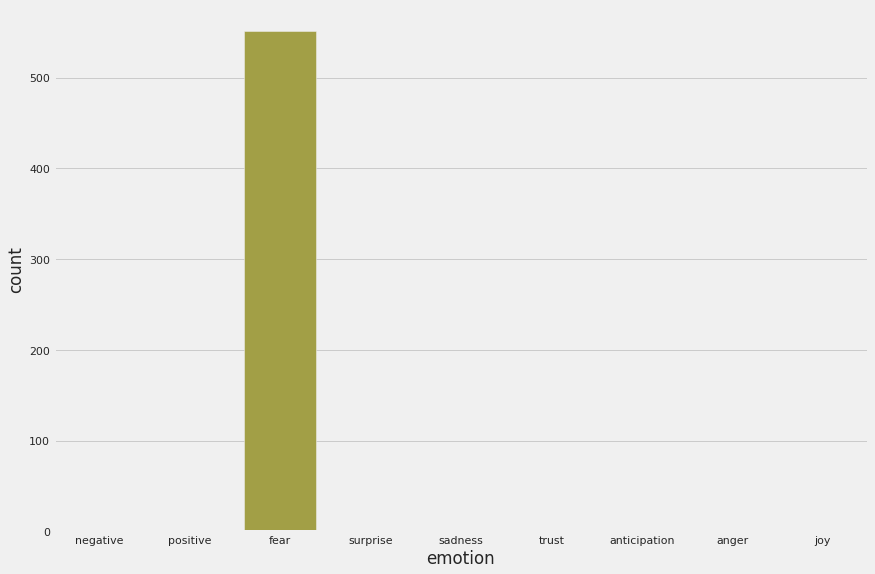


Cluster:  5




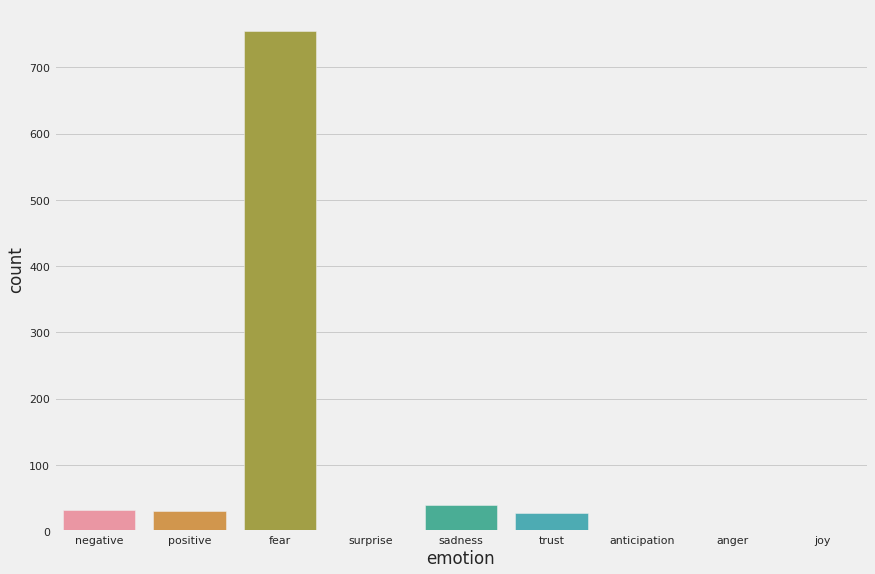


Cluster:  6




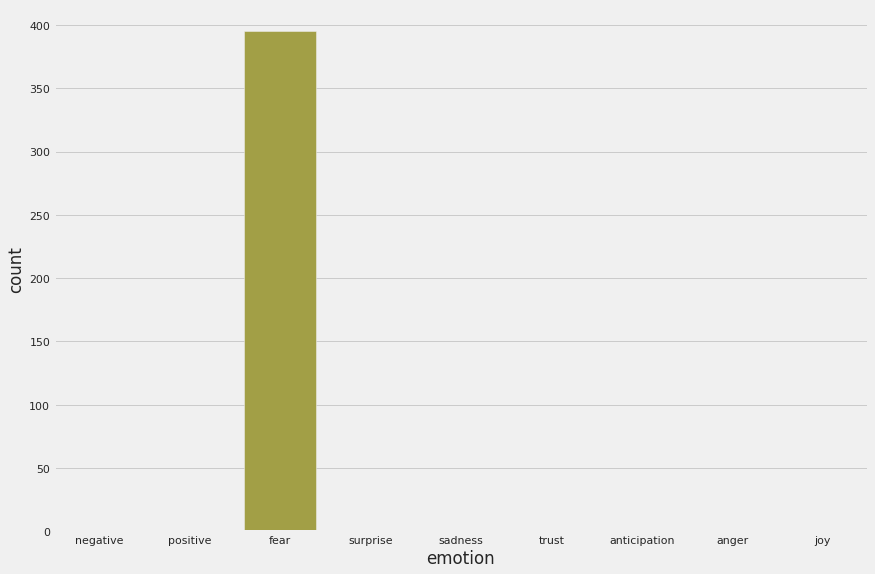


Cluster:  7




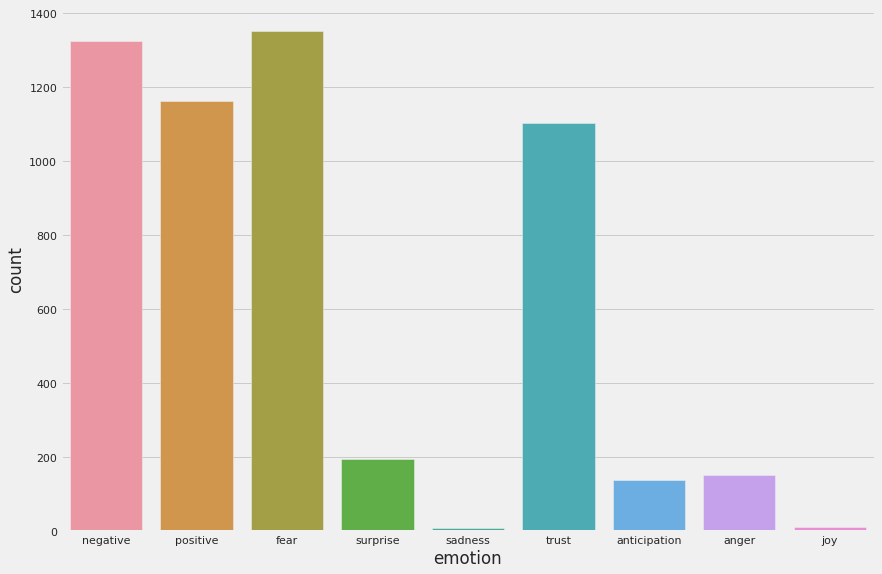


Cluster:  8




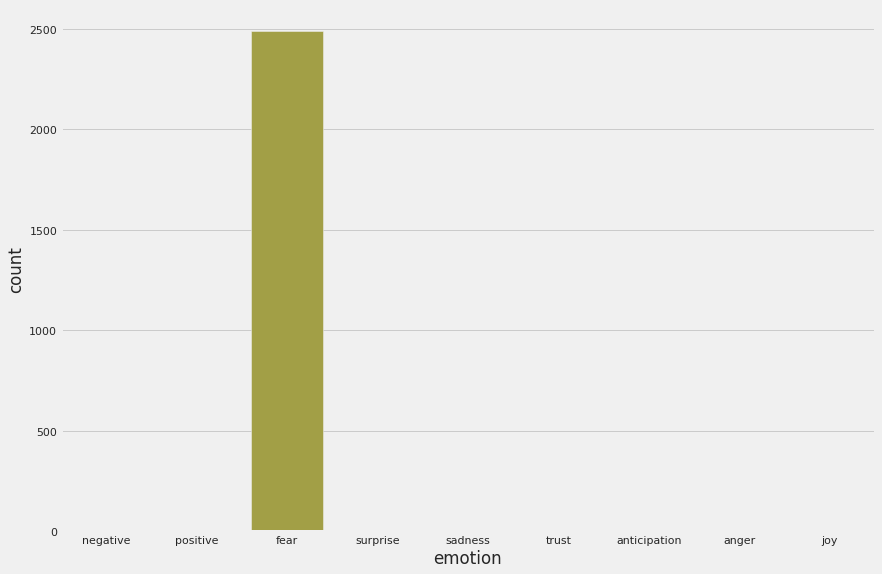


Cluster:  9




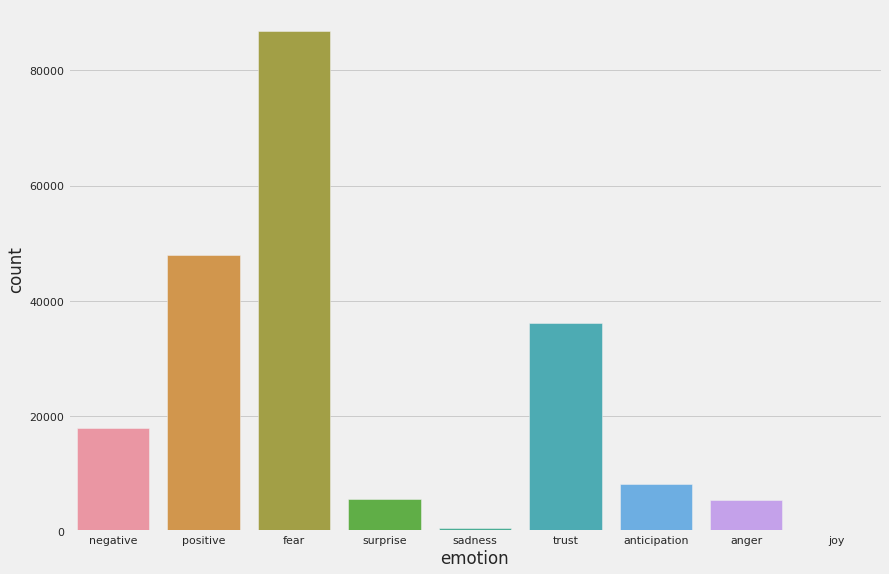

In [ ]:
for c in range (0,num_clusters):
  df=tweets[tweets['cluster']==c]
  print("\nCluster: ",c)
  print("\n")
  ax = sns.countplot(x= 'emotion',data=df,order=['negative', 'positive', 'fear', 'surprise', 'sadness','trust','anticipation','anger', 'joy'])
  
  plt.show()

# Masks Dataframe

In [ ]:
tweet_masks.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,text_tokenized,text_lemmatized,text_stemmed,stemmed_string,lemmatized_string
0,The Connexion,France,France's English newspaper | Le journal frança...,2009-07-04 22:54:58,8081,1080,221,False,2020-08-30 09:05:42,An anti-mask protest in #Paris this weekend dr...,['Paris'],Twitter Web App,False,anti mask protest paris this weekend drew peop...,"[anti, mask, protest, paris, weekend, drew, pe...","[anti, mask, protest, paris, weekend, drew, pe...","[anti, mask, protest, pari, weekend, drew, peo...",anti mask protest pari weekend drew peopl end ...,anti mask protest paris weekend drew people en...
1,American Warrior,NaN,NaN,2011-10-10 00:51:11,706,444,18582,False,2020-08-30 09:05:27,California why the hell are we allowing leftis...,NaN,Twitter Web App,False,california hell allowing leftists tell wear ma...,"[california, hell, allowing, leftists, tell, w...","[california, hell, allowing, leftist, tell, we...","[california, hell, allow, leftist, tell, wear,...",california hell allow leftist tell wear mask s...,california hell allowing leftist tell wear mas...
2,NHS East Berkshire CCG,windsor,Since 1 April 2018 the CCGs in East Berkshire–...,2018-03-05 10:52:49,1576,1933,187,True,2020-08-30 09:01:21,Stay safe while you’re out &amp; about this we...,NaN,Orlo,False,stay safe while about this weekend remember ke...,"[stay, safe, weekend, remember, keep, meters, ...","[stay, safe, weekend, remember, keep, meter, a...","[stay, safe, weekend, rememb, keep, meter, apa...",stay safe weekend rememb keep meter apart wear...,stay safe weekend remember keep meter apart we...
3,HSE Health Protection Surveillance Centre (HPSC),"Dublin, Ireland",HPSC is Ireland's specialist agency for the su...,2011-05-24 15:11:44,20797,783,5148,True,2020-08-30 09:00:54,Wearing a face covering helps stop the spread ...,NaN,Hootsuite Inc.,False,wearing face covering helps stop spread covid ...,"[wearing, face, covering, helps, stop, spread,...","[wearing, face, covering, help, stop, spread, ...","[wear, face, cover, help, stop, spread, covid,...",wear face cover help stop spread covid especi ...,wearing face covering help stop spread covid e...
4,FrimleyHealth&CareICS,NaN,"A partnership of local NHS organisations, Loca...",2018-10-24 14:44:24,799,80,570,True,2020-08-30 09:00:38,Stay safe while you’re out &amp; about this we...,NaN,Hootsuite Inc.,False,stay safe while about this weekend remember ke...,"[stay, safe, weekend, remember, keep, meters, ...","[stay, safe, weekend, remember, keep, meter, a...","[stay, safe, weekend, rememb, keep, meter, apa...",stay safe weekend rememb keep meter apart wear...,stay safe weekend remember keep meter apart we...


In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords_eng, 
max_features= 1000, # keep top 1000 terms
max_df=0.3, 
min_df = 50, 
smooth_idf=True,
use_idf = True,
ngram_range=(1,3))

#vectorizer = TfidfVectorizer(use_idf = True, ngram_range=(1,2))

 
X = vectorizer.fit_transform(tweet_masks['lemmatized_string'])
terms = vectorizer.get_feature_names()

In [ ]:
num_clusters = 20

km = KMeans(n_clusters=num_clusters,init='k-means++', max_iter=100, n_init=10, random_state=1)

labels = km.fit_predict(X)

In [ ]:
tweet_masks['cluster'] = labels

In [ ]:
#most important n-gramms (words) in each cluster

print("K-means clustering: \n")
asc_order_centroids = km.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print('\n')


K-means clustering: 

Cluster 0:
 wearing
 wearing mask
 people
 mask wearing
 people wearing mask
 people wearing
 mask covid
 spread
 public
 protect


Cluster 1:
 like
 look
 wearing mask
 wearing
 wear
 face
 people
 wear mask
 feel
 would


Cluster 2:
 mask covid
 wear mask covid
 wear
 wear mask
 covid covid
 need
 people
 mask mask
 coronavirus
 make


Cluster 3:
 wearamask covid
 wearamask
 covid covid
 covid coronavirus
 coronavirus
 people
 wearing mask
 thank
 wearing
 wear mask


Cluster 4:
 face
 face shield
 shield
 face covid
 pandemic
 covid pandemic
 time
 protective
 health
 crisis


Cluster 5:
 face mask
 face
 covering
 face covering
 wear face
 wearing face
 wear
 wearing
 wearing face mask
 wear face mask


Cluster 6:
 wear
 wear mask
 people
 please
 distance
 refuse
 protect
 please wear
 please wear mask
 need


Cluster 7:
 wearamask
 covid wearamask
 socialdistancing
 staysafe
 pandemic
 wear
 people
 covid covid
 time
 right


Cluster 8:
 distancing
 social d

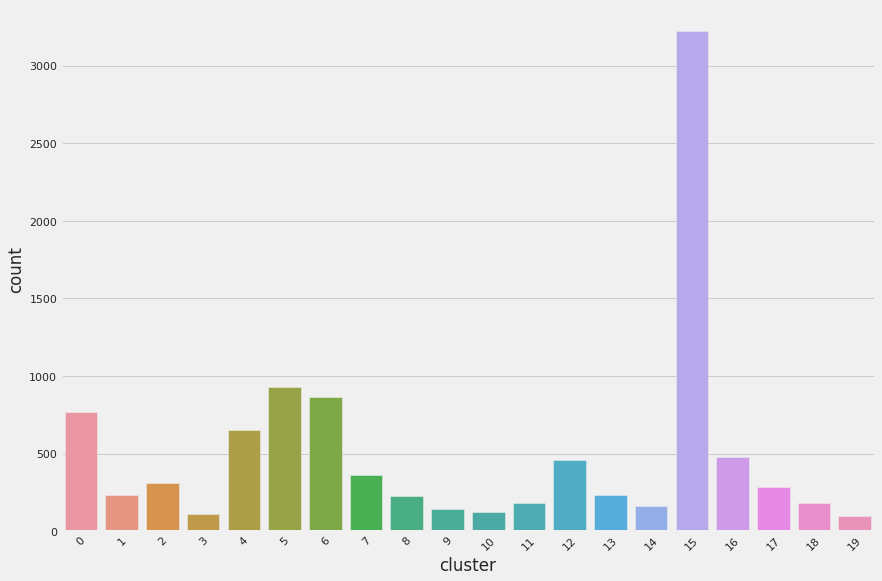

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='cluster', data=tweet_masks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
tweet_masks['emotion']=''

In [ ]:
for i in range(1,tweet_masks.shape[0]):
  text = tweet_masks['lemmatized_string'][i]
  text_object = NRCLex(text)
  tweet_masks['emotion'][i] = text_object.top_emotions[0][0]
  #tweets['emotion_score'][i] = text_object.top_emotions[0][1]
  #print("\n")
  #print(text_object.words)
  #print(text_object.top_emotions)
  #print(i)
  #print("\n")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



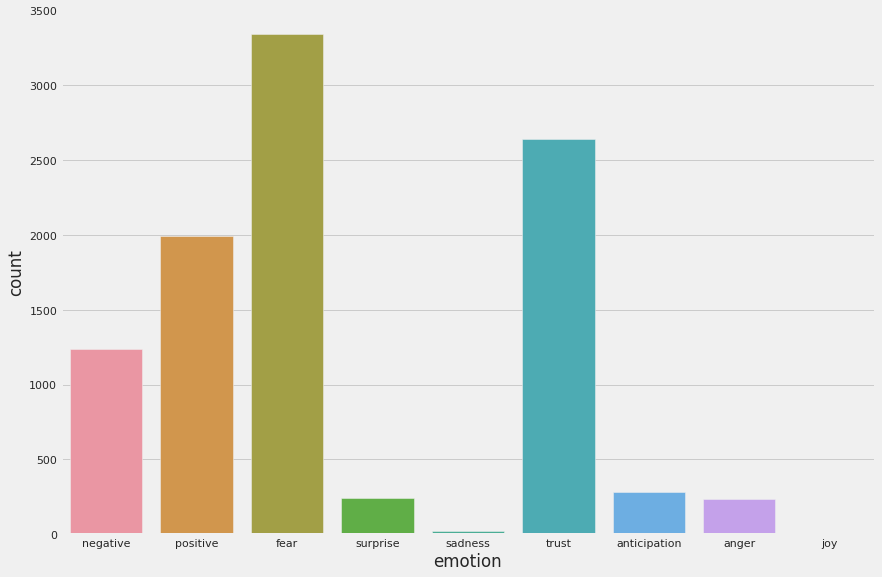

In [ ]:
ax = sns.countplot(x= 'emotion', data=tweet_masks, order=['negative', 'positive', 'fear', 'surprise', 'sadness','trust','anticipation','anger', 'joy'])
plt.show()

In [ ]:
tweet_masks[tweet_masks['emotion']=='fear'].text.sample(20)

9035    @Theresa_Trog Well, technically he's wearing a...
1835    No more masquerade ball parties in Italy.\n \n...
3388       Amazing #COVID19 mask. https://t.co/x81t6DHDuk
9581    Time 2 admit that #COVIDIOT #COVID19 fear is m...
1502    Happy to see the decreasing in #COVID19 cases....
376     America take off your masks and open everythin...
8372    Make sure you #MaskUpTexas. It's a simple and ...
6557    I feel I should send out some #MLB before #COV...
29      #Wales has no #MandatoryMasks in enclosed spac...
9291    #SaturdayMorning #SaturdayThoughts on #Fauci #...
4107        #COVID19 and masks... https://t.co/hmOvOa8klv
8981    Went for a run. Saw a #facemask blowing around...
3907    Mask fogging up? Here are tips. Line the insid...
4880    Identifying airborne transmission as the domin...
6110    Seems like being a ventriloquist should be eas...
4347    @marcorubio It would've been better if we shut...
7521    Way to go Louie!  @replouiegohmert - You sure ...
8446    This i